In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
celular = pd.read_csv("Celular.csv", delimiter=',')
celular.head(6)

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1


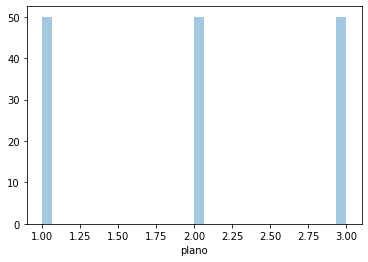

In [ ]:
sns.distplot(celular['plano'], bins=30, kde=False)

In [ ]:
X = celular.iloc[:, :-1].values
y= celular.iloc[:, 4].values

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3)

In [ ]:
classificador_arvore = tree.DecisionTreeClassifier()

In [ ]:
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import graphviz

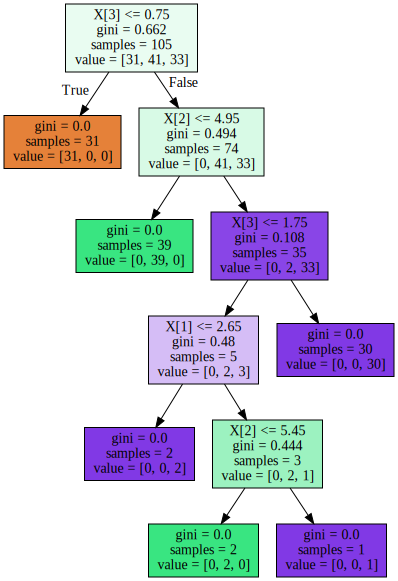

In [ ]:
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None) 

grafico = graphviz.Source(dot_data)
grafico

In [ ]:
plano_previsto = classificador_arvore.predict(X_teste)
plano_previsto

array([3, 1, 1, 1, 1, 3, 1, 3, 2, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1,
       3, 2, 1, 2, 1, 3, 2, 2, 1, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 2, 2, 2,
       2])

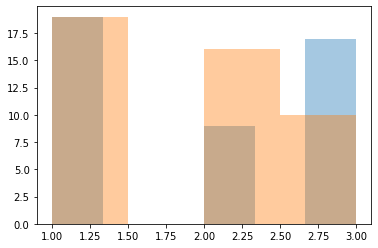

In [ ]:
sns.distplot(y_teste,bins=6, kde=False)
sns.distplot(plano_previsto,bins=4, kde=False)

#visualização ruim

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, plano_previsto)

0.8444444444444444

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

vizinho = KNeighborsClassifier(5)
#esse número não pode ser igual e nem múltiplo do número de classes

In [ ]:
vizinho.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

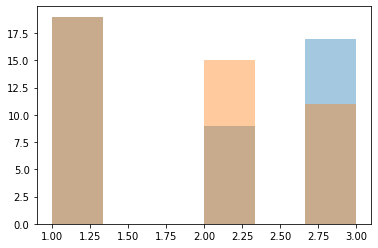

In [ ]:
plano_previsto_v = vizinho.predict(X_teste)

sns.distplot(y_teste, kde=False, bins=6)
sns.distplot(plano_previsto_v, kde=False, bins=6)

In [ ]:
accuracy_score(y_teste, plano_previsto_v)

0.8666666666666667

In [ ]:
plano_previsto_v2 = vizinho.predict(X_treino)

In [ ]:
accuracy_score(y_treino, plano_previsto_v2)

0.9809523809523809

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [ ]:
params = {'n_neighbors': [5]}

In [ ]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=skfold, verbose=1, scoring='accuracy', return_train_score=True)

In [ ]:
gs.fit(X, y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [ ]:
gs.cv_results_['mean_test_score']

array([0.964])

In [ ]:
#k-means é usado quando não se sabe quais são as classes, no k-neighbors se sabe

from sklearn.cluster import KMeans

In [ ]:
engajamento = pd.read_csv('Engajamento.csv')
X = engajamento.iloc[:,:-1]
X.head()

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

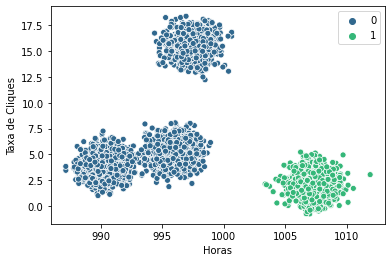

In [ ]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data = X, hue = kmeans.labels_ , palette = 'viridis')

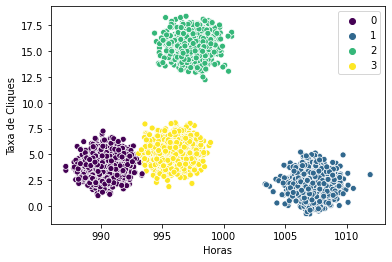

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

sns.scatterplot(x='Horas', y='Taxa de Cliques', data = X, hue = kmeans.labels_ , palette = 'viridis')

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clustering_o = OPTICS(min_samples=800).fit(X)

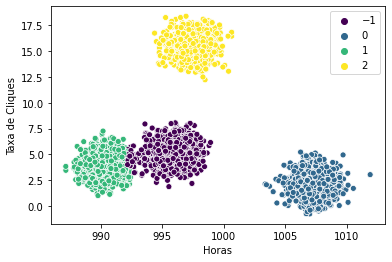

In [ ]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', data=X, hue=clustering_o.labels_, palette = 'viridis')

In [ ]:
Classe_conhecida = engajamento['Classe']
Classe_estimada = clustering_o.labels_

In [ ]:
from sklearn import metrics

In [ ]:
metrics.adjusted_rand_score(Classe_conhecida, Classe_estimada)

0.9821047486293407

In [ ]:
metrics.adjusted_rand_score(Classe_conhecida, kmeans.labels_)

0.9957444328155858

In [ ]:
#calcular o quão bem definidos os grupos são, já que não conhecemos as classes
metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')

0.7640009351490763

In [ ]:
metrics.silhouette_score(X, Classe_estimada, metric = 'euclidean')

0.7590075270703337